## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Read CSV File

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Title,stock_status,prices
0,لپ تاپ لنوو ideapad 3 | 4gb ram | 1tb hdd | ...,new,از ۸٫۱۲۵٫۰۰۰ تومان
1,لپ تاپ لنوو ideapad gaming 3 | 16gb ram | 512g...,new,از ۳۴٫۴۷۹٫۰۰۰ تومان
2,مک بوک ایر 8gb ram | 256gb ssd | m1 | mgn63 ا ...,new,از ۳۷٫۰۰۰٫۰۰۰ تومان
3,لپ تاپ ایسوس fx517zr | 16gb ram | 512gb ssd | ...,new,از ۵۷٫۶۰۰٫۰۰۰ تومان
4,لپ تاپ لنوو ideapad 3 | 12gb ram | 256gb ssd |...,new,از ۱۴٫۶۵۰٫۰۰۰ تومان


## Separate X & Y

In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Install Unidecode Library

Convert persian number into english number

In [4]:
!pip install unidecode

## Extract Price

In [5]:
import re
from unidecode import unidecode
def getnumber(s):
  return int(unidecode(re.findall(r'-?\d+\٫?\d+\٫?\d+', s)[0].replace('٫','')))

In [6]:
y = y.apply(getnumber)

In [7]:
y

0        8125000
1       34479000
2       37000000
3       57600000
4       14650000
          ...   
1171     9400000
1172     7850000
1173    36000000
1174    48200000
1175    12100000
Name: prices, Length: 1176, dtype: int64

## Apply Normalizing Functions

In [8]:
from string import punctuation
# Create a function to remove punctuations
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', punctuation))

# Create a function to lowercase the words
def to_lower(x):
    return x.lower()

### Stemming

Stemming is a text processing task in which you reduce words to their root, which is the core part of a word.

In [9]:
# Stem the Words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

x['Title'] = x['Title'].apply(porter.stem)
x['Title'] = x['Title'].apply(remove_punctuation)
x['Title'] = x['Title'].apply(to_lower)

<ipython-input-9-ad2bc327e9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Title'] = x['Title'].apply(porter.stem)
<ipython-input-9-ad2bc327e9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Title'] = x['Title'].apply(remove_punctuation)
<ipython-input-9-ad2bc327e9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [10]:
x['Title'].head()

0    لپ تاپ لنوو  ideapad 3   4gb ram  1tb hdd  n40...
1    لپ تاپ لنوو ideapad gaming 3  16gb ram  512gb ...
2    مک بوک ایر 8gb ram  256gb ssd  m1  mgn63 ا mac...
3    لپ تاپ ایسوس fx517zr  16gb ram  512gb ssd  i7 ...
4    لپ تاپ لنوو ideapad 3  12gb ram  256gb ssd  1t...
Name: Title, dtype: object

## Vectorization

Each word in our feature space can have different frequency weights

- Frequency Weight
- TF-IDF Weight
- Binary

## CountVectorizer

Returns an encoded vector with integer count for each word

## TF-IDF(min_df, max_df, n-gram)

This is to capture rarity of the word. Returns encoded vector with weighted count for each word (utilizes the word in the document in corresponsdence to the whole corpus, to keep it short, more emphasis on the rarity of a word). This is good because we want to find frequent terms from that document that isn't so frequent within the whole document corpus.

## TFIDF

### Main Goal

Measure how important a word or phrase is within a collection of documents. It essentially weigh down terms that appear frequently and scale up unique terms.

### TF Term Frequency

how often a term occurs

### IDF Inverse Document Frequency

how important a term is

Important Parameters
- ngram_range
- stop_words
- lowercase
- max_df - max threshold that will ignore a term that has a document frequency higher than the threshold
- min_df - min threshold that will ignore a term that has a document frequency lower than the threshold
- max_features - gets the assigned amount of features with highest amount of term frequencies (scores)

In [11]:
# Perform a TFIDF Transformation of the item description with the top 55000 features and has an n-gram range of 1-2
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
x_title = tv.fit_transform(x['Title'])

In [12]:
x_title

<1176x6967 sparse matrix of type '<class 'numpy.float64'>'
	with 32161 stored elements in Compressed Sparse Row format>

In [13]:
x['stock_status'].value_counts()

new      987
stock    189
Name: stock_status, dtype: int64

## Label Encoding For Stock Status Column

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_stock = le.fit_transform(x['stock_status'])

In [15]:
x_stock[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## Plot Histogram of Price

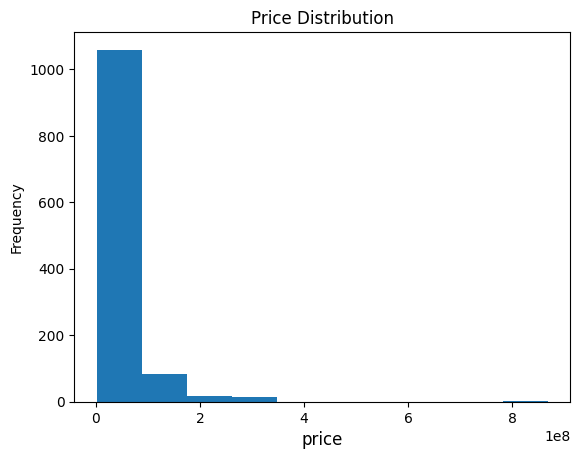

In [16]:
# Plot Price Distribution
y.plot.hist()
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)
plt.show()

## Taking log(price)

Generally, the Root Mean Squared Error (RMSE) metric is used for regression tasks. But as price followed a long-tailed distribution, in order to make errors on low price product more relevant than for higher prices, the metric chosen for competition evaluation was Root Mean Squared Logarithmic Error (RMSLE). Thus, I applied the log transformation to the price target variable, to make this assumption available for model training.



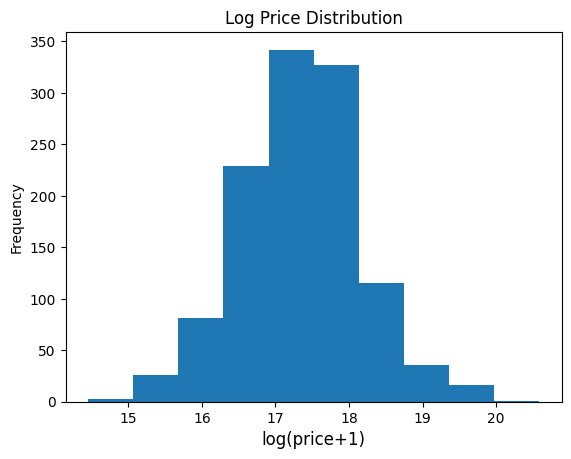

In [17]:
# Plot Price Distribution
np.log(y+1).plot.hist()
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Log Price Distribution', fontsize=12)
plt.show()

In [18]:
from scipy.sparse import csr_matrix, hstack
# Combine everything together using Sparse matrix
x_train = hstack((x_title, x_stock.reshape(1176,1))).toarray()
print(x_train.shape)

(1176, 6968)


In [19]:
y_train = np.log(y+1)
print(y_train.shape)

(1176,)


## Create Model

In [20]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential(
    [
        Dense(units=128, input_dim=x_train.shape[-1], activation='relu', name='input'),
        Dense(units=128, activation='relu', name='layer1'),
        Dense(units=128, activation='relu', name='layer2'),
        Dense(units=64, activation='relu', name='layer3'),
        Dense(units=1, activation='linear', name='output')
    ],
    name='Price_Model'
)
model.summary()

Model: "Price_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               892032    
                                                                 
 layer1 (Dense)              (None, 128)               16512     
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 layer3 (Dense)              (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 933,377
Trainable params: 933,377
Non-trainable params: 0
_________________________________________________________________


## Compile & Fit Model

In [21]:
from keras.callbacks import ModelCheckpoint

#Model_Checkpoint
checkpoint_path = '/content/model/best.h5'

model_calback = ModelCheckpoint(filepath=checkpoint_path,
                                monitor='loss',
                                verbose=2,
                                save_best_only = True,
                                )
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(x_train, y_train, batch_size=64, epochs=500, verbose=2, callbacks=[model_calback])

Epoch 1/500

Epoch 1: loss improved from inf to 281.02417, saving model to /content/model/best.h5
19/19 - 3s - loss: 281.0242 - mse: 281.0242 - mae: 16.7297 - 3s/epoch - 169ms/step
Epoch 2/500

Epoch 2: loss improved from 281.02417 to 80.22412, saving model to /content/model/best.h5
19/19 - 0s - loss: 80.2241 - mse: 80.2241 - mae: 7.7162 - 139ms/epoch - 7ms/step
Epoch 3/500

Epoch 3: loss improved from 80.22412 to 13.51705, saving model to /content/model/best.h5
19/19 - 0s - loss: 13.5171 - mse: 13.5171 - mae: 3.0368 - 124ms/epoch - 7ms/step
Epoch 4/500

Epoch 4: loss improved from 13.51705 to 3.88238, saving model to /content/model/best.h5
19/19 - 0s - loss: 3.8824 - mse: 3.8824 - mae: 1.5708 - 134ms/epoch - 7ms/step
Epoch 5/500

Epoch 5: loss improved from 3.88238 to 1.50348, saving model to /content/model/best.h5
19/19 - 0s - loss: 1.5035 - mse: 1.5035 - mae: 0.9650 - 124ms/epoch - 7ms/step
Epoch 6/500

Epoch 6: loss improved from 1.50348 to 0.56573, saving model to /content/model/b

### Plot Mean Absolute Error & Mean Squared Error

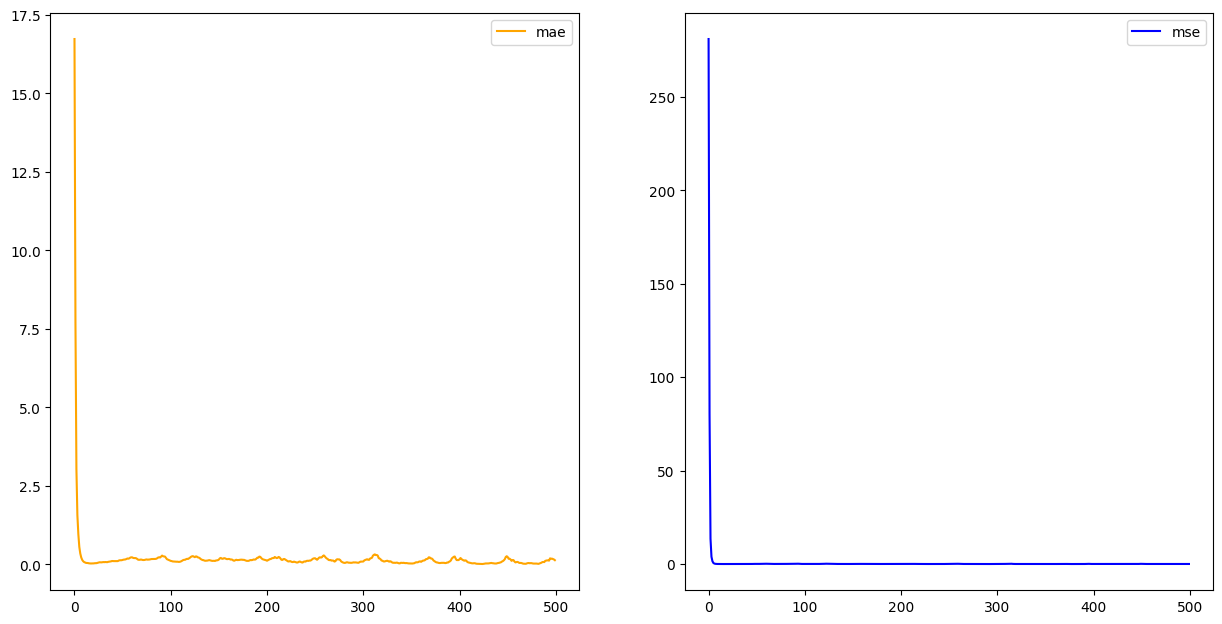

In [22]:
f = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(history.history['mae'],
         label='mae',
         c='orange', ls='-')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['mse'],
         label='mse',
         c='blue', ls='-')
plt.legend()
plt.show()

## Preparing Sampling for Prediction

In [23]:
def test(title, stock):
  stock = np.array(stock)
  spec = remove_punctuation(title)
  spec = to_lower(spec)
  spec = tv.transform([spec])
  x_test = hstack((spec, stock)).toarray()
  pred = model.predict(x_test)
  return np.expm1(pred)

### Prediction

In [24]:
n = int(input('Enter number of sample do you want?'))
for i in range(n):
  discription = input("Description:")
  stock = int(input('Stock:'))
  print(test(discription, stock))

Enter number of sample do you want?1
Description:مک بوک ایر 8GB RAM | 256GB SSD | M1 | MGN63 ا Macbook Air MGN63
Stock:0
1/1 [==============================] - 0s 87ms/step
[[45718072.]]
